# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
import re
from collections import defaultdict, Counter

# Sample dataset
dataset = [
    "This is the first review. It is really good.",
    "This is the second review. It is not as good as the first one.",

]

# Function to generate N-grams
def generate_ngrams(text, n):
    words = re.findall(r'\b\w+\b', text.lower())
    ngrams = zip(*[words[i:] for i in range(n)])
    return [' '.join(ngram) for ngram in ngrams]

# Function to count N-grams
def count_ngrams(dataset, n):
    ngram_counts = Counter()
    for text in dataset:
        ngrams = generate_ngrams(text, n)
        ngram_counts.update(ngrams)
    return ngram_counts

# Function to calculate bigram probabilities
def calculate_bigram_probabilities(dataset):
    bigram_counts = count_ngrams(dataset, 2)
    unigram_counts = count_ngrams(dataset, 1)
    bigram_probabilities = {}
    for bigram in bigram_counts:
        w1, w2 = bigram.split()
        bigram_probabilities[bigram] = bigram_counts[bigram] / unigram_counts[w1]
    return bigram_probabilities

# Function to extract noun phrases (simple heuristic)
def extract_noun_phrases(text):
    # This is a very basic heuristic for noun phrase extraction
    noun_phrases = re.findall(r'\b(?:\w+\s+){0,2}\w+\b', text.lower())
    return noun_phrases

# Function to calculate relative probabilities of noun phrases
def calculate_relative_probabilities(dataset):
    noun_phrase_counts = Counter()
    for text in dataset:
        noun_phrases = extract_noun_phrases(text)
        noun_phrase_counts.update(noun_phrases)

    max_frequency = max(noun_phrase_counts.values())
    relative_probabilities = {phrase: count / max_frequency for phrase, count in noun_phrase_counts.items()}

    return relative_probabilities, max_frequency

# Function to print results in a table
def print_results_table(dataset):
    relative_probabilities, max_frequency = calculate_relative_probabilities(dataset)
    noun_phrases = list(relative_probabilities.keys())

    print("Review", "\t".join(noun_phrases))
    for i, text in enumerate(dataset):
        row = [f"Review {i+1}"]
        for phrase in noun_phrases:
            count = text.lower().count(phrase)
            row.append(f"{count / max_frequency:.2f}")
        print("\t".join(row))

# Main execution
ngram_counts = count_ngrams(dataset, 3)
bigram_probabilities = calculate_bigram_probabilities(dataset)
print("N-gram Counts (N=3):", ngram_counts)
print("Bigram Probabilities:", bigram_probabilities)
print_results_table(dataset)


N-gram Counts (N=3): Counter({'this is the': 2, 'review it is': 2, 'is the first': 1, 'the first review': 1, 'first review it': 1, 'it is really': 1, 'is really good': 1, 'is the second': 1, 'the second review': 1, 'second review it': 1, 'it is not': 1, 'is not as': 1, 'not as good': 1, 'as good as': 1, 'good as the': 1, 'as the first': 1, 'the first one': 1})
Bigram Probabilities: {'this is': 1.0, 'is the': 0.5, 'the first': 0.6666666666666666, 'first review': 0.5, 'review it': 1.0, 'it is': 1.0, 'is really': 0.25, 'really good': 1.0, 'the second': 0.3333333333333333, 'second review': 1.0, 'is not': 0.25, 'not as': 1.0, 'as good': 0.5, 'good as': 0.5, 'as the': 0.5, 'first one': 0.5}
Review this is the	first review	it is really	good	second review	it is not	as good as	the first one
Review 1	0.50	0.50	0.50	0.50	0.00	0.00	0.00	0.00
Review 2	0.50	0.00	0.00	0.50	0.50	0.50	0.50	0.50


## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [ ]:
import math
from collections import defaultdict, Counter

# New sample dataset
documents = [
    "An outstanding movie with a haunting performance and best character development.",
    "The movie had a great storyline and the character development was superb.",
    "A haunting performance by the lead actor made this movie unforgettable.",
    "Best character development and an outstanding movie experience.",
    # Add more documents here
]

# Function to tokenize text
def tokenize(text):
    return text.lower().split()

# Function to calculate term frequency (TF)
def compute_tf(doc):
    tf = Counter(tokenize(doc))
    total_terms = len(tokenize(doc))
    for term in tf:
        tf[term] /= total_terms
    return tf

# Function to calculate inverse document frequency (IDF)
def compute_idf(docs):
    idf = defaultdict(lambda: 0)
    total_docs = len(docs)
    for doc in docs:
        terms = set(tokenize(doc))
        for term in terms:
            idf[term] += 1
    for term in idf:
        idf[term] = math.log(total_docs / idf[term])
    return idf

# Function to calculate TF-IDF
def compute_tfidf(docs):
    idf = compute_idf(docs)
    tfidf = []
    for doc in docs:
        tf = compute_tf(doc)
        tfidf_doc = {term: tf[term] * idf[term] for term in tf}
        tfidf.append(tfidf_doc)
    return tfidf

# Function to build the documents-terms weights (tf * idf) matrix
def build_tfidf_matrix(docs):
    tfidf = compute_tfidf(docs)
    terms = set(term for doc in tfidf for term in doc)
    matrix = []
    for doc in tfidf:
        row = [doc.get(term, 0) for term in terms]
        matrix.append(row)
    return matrix, list(terms)

# Function to compute cosine similarity
def cosine_similarity(vec1, vec2):
    dot_product = sum(a * b for a, b in zip(vec1, vec2))
    magnitude1 = math.sqrt(sum(a * a for a in vec1))
    magnitude2 = math.sqrt(sum(a * a for a in vec2))
    if not magnitude1 or not magnitude2:
        return 0.0
    return dot_product / (magnitude1 * magnitude2)

# Function to rank documents based on a query
def rank_documents(query, docs, terms, idf):
    query_tfidf = compute_tf(query)
    query_vector = [query_tfidf.get(term, 0) * idf.get(term, 0) for term in terms]
    print("Query Vector:", query_vector)  # Debug print
    similarities = []
    for doc_vector in docs:
        similarity = cosine_similarity(query_vector, doc_vector)
        similarities.append(similarity)
    ranked_docs = sorted(enumerate(similarities), key=lambda x: x[1], reverse=True)
    return ranked_docs

# Main execution
tfidf_matrix, terms = build_tfidf_matrix(documents)
idf_values = compute_idf(documents)  # Compute IDF values separately
print("TF-IDF Matrix:")
for row in tfidf_matrix:
    print(row)
print("Terms:", terms)

# Example query
query = "An outstanding movie with a haunting performance and best character development"

ranked_docs = rank_documents(query, tfidf_matrix, terms, idf_values)
print("Ranked Documents:")
for index, similarity in ranked_docs:
    print(f"Document {index + 1}: Similarity = {similarity:.4f}")


TF-IDF Matrix:
[0.0, 0.06301338005090412, 0, 0.12602676010180824, 0, 0.026152915677434625, 0.06301338005090412, 0.06301338005090412, 0, 0.12602676010180824, 0.026152915677434625, 0, 0.06301338005090412, 0, 0, 0, 0, 0, 0.026152915677434625, 0, 0.06301338005090412, 0, 0, 0, 0]
[0.0, 0, 0, 0, 0, 0.023973506037648404, 0, 0, 0, 0, 0.023973506037648404, 0.057762265046662105, 0, 0.11552453009332421, 0.11552453009332421, 0, 0, 0, 0.023973506037648404, 0.11552453009332421, 0, 0, 0.11552453009332421, 0.11552453009332421, 0.11552453009332421]
[0.0, 0, 0.12602676010180824, 0, 0, 0, 0, 0.06301338005090412, 0.12602676010180824, 0, 0.026152915677434625, 0, 0.06301338005090412, 0, 0.06301338005090412, 0.12602676010180824, 0.12602676010180824, 0.12602676010180824, 0, 0, 0, 0.12602676010180824, 0, 0, 0]
[0.0, 0.08664339756999316, 0, 0, 0.17328679513998632, 0.035960259056472606, 0.08664339756999316, 0, 0, 0, 0, 0.08664339756999316, 0, 0, 0, 0, 0, 0, 0.035960259056472606, 0, 0.08664339756999316, 0, 0, 0, 

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

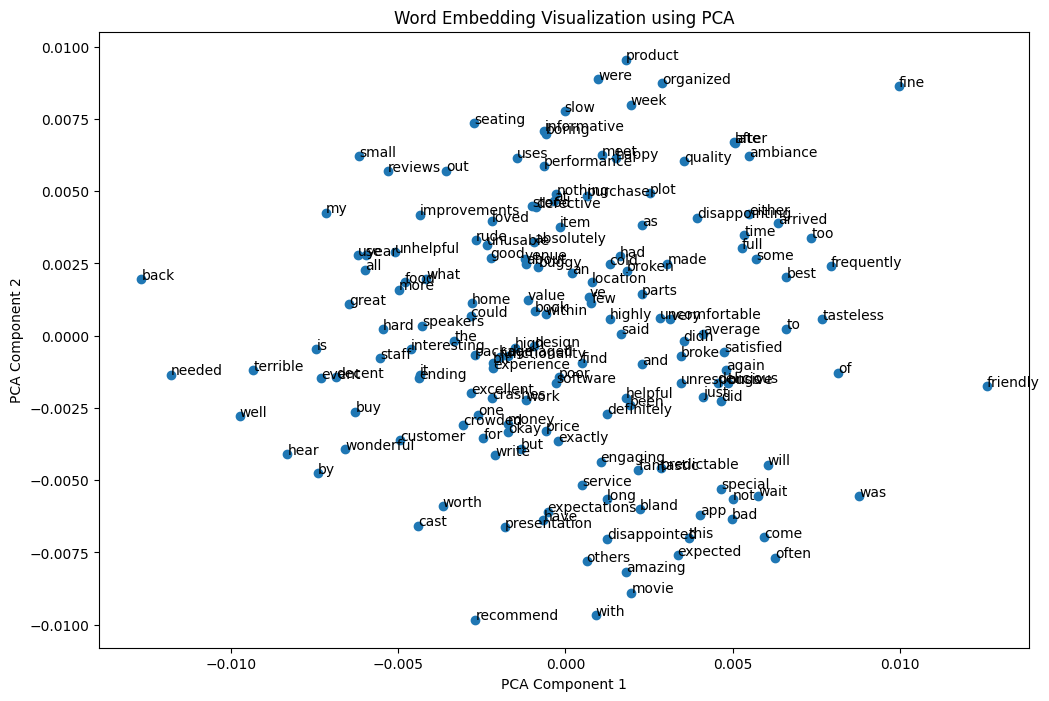

In [11]:
# Write your code here


import gensim
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Sample data collected for assignment 2 (100 reviews)
data = [
    "This movie was fantastic! Loved it.",
    "The product broke after one use.",
    "It was okay, nothing special.",
    "Amazing service, very satisfied!",
    "Not worth the money.",
    "The food was average, nothing to write home about.",
    "Excellent quality, highly recommend!",
    "Terrible customer service, very disappointed.",
    "The book was interesting but had some slow parts.",
    "Best purchase I've made this year!",
    "The item arrived damaged and unusable.",
    "It was fine, just as expected.",
    "Wonderful experience, will definitely come back.",
    "The software is full of bugs and crashes often.",
    "The event was well-organized but a bit crowded.",
    "Loved the ambiance and the food was delicious!",
    "The product did not meet my expectations.",
    "It was an average experience, nothing stood out.",
    "Fantastic performance by the cast!",
    "The app is very slow and unresponsive.",
    "The service was okay, not great but not bad either.",
    "Absolutely loved it, will buy again!",
    "The quality is poor and it broke within a week.",
    "The presentation was decent but could use some improvements.",
    "Great value for the price, very happy with my purchase.",
    "The movie was boring and too long.",
    "The product is just okay, nothing special.",
    "Excellent customer service, very helpful staff.",
    "The food was cold and tasteless.",
    "The event was okay, but the venue was too small.",
    "Loved the design and functionality of this product!",
    "The package arrived late and was damaged.",
    "The book was okay, but not as good as I expected.",
    "Fantastic service, will definitely recommend to others.",
    "The software is very buggy and crashes frequently.",
    "The movie was okay, but the ending was disappointing.",
    "Great product, exactly what I needed!",
    "The customer service was rude and unhelpful.",
    "The event was okay, but the location was hard to find.",
    "Loved the product, very high quality!",
    "The item was defective and didn't work at all.",
    "The presentation was okay, but could have been more engaging.",
    "Excellent experience, will definitely come back!",
    "The food was terrible, very disappointed.",
    "The service was okay, but the wait time was too long.",
    "Great quality, very satisfied with my purchase.",
    "The product broke after a few uses, very poor quality.",
    "The event was okay, but the speakers were hard to hear.",
    "Loved the service, very friendly staff!",
    "The software is very slow and crashes often.",
    "The movie was okay, but not as good as the reviews said.",
    "Fantastic product, highly recommend!",
    "The item arrived broken and unusable.",
    "The book was okay, but not very engaging.",
    "Great service, very happy with my experience.",
    "The food was bland and not worth the price.",
    "The event was okay, but the seating was uncomfortable.",
    "Loved the product, very high quality!",
    "The customer service was unhelpful and rude.",
    "The presentation was okay, but could have been more informative.",
    "Excellent product, very satisfied with my purchase.",
    "The item broke after a few uses, very poor quality.",
    "The movie was okay, but the plot was predictable.",
    "Great experience, will definitely recommend to others.",
    "The software is very buggy and crashes frequently.",
    "The service was okay, but the staff was not very friendly.",
    "Loved the product, very high quality!",
    "The food was cold and tasteless.",
    "The event was okay, but the venue was too small.",
    "Excellent service, very satisfied!",
    "The item arrived damaged and unusable.",
    "The book was okay, but not as good as I expected.",
    "Fantastic product, highly recommend!",
    "The customer service was rude and unhelpful.",
    "The presentation was okay, but could have been more engaging.",
]

# Preprocess data: tokenize sentences
tokenized_data = [gensim.utils.simple_preprocess(sentence) for sentence in data]

# Train a Word2Vec model
model = Word2Vec(sentences=tokenized_data, vector_size=300, window=5, min_count=1)

# Visualize word embeddings using PCA
words = list(model.wv.index_to_key)
word_vectors = model.wv[words]

pca = PCA(n_components=2)
result = pca.fit_transform(word_vectors)

plt.figure(figsize=(12, 8))
plt.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(words):
     plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.title("Word Embedding Visualization using PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()





## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file


# Link:
https://github.com/rithvik2/RithvikINFO5731/blob/main/Question%204.csv


# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

Here's my
Reflection on the assignment, I found the data collection and annotation process to be quite challenging. Gathering a diverse set of reviews that accurately represent different sentiments required careful selection and significant time. Annotating each review with the correct sentiment was also tricky, as it involved subjective judgment, especially for borderline cases. Training the word embedding model was another challenge, given the computational resources needed and the complexity of fine-tuning the model parameters for optimal performance.

On the enjoyable side, the assignment provided a great learning experience. Building a word embedding model from scratch helped deepen my understanding of natural language processing. Visualizing the word embeddings was particularly rewarding, as it offered a tangible way to see the relationships between words and uncover interesting patterns. Additionally, knowing that these skills can be applied to real-world problems, such as sentiment analysis for customer feedback, added a layer of satisfaction.

Regarding the time provided for the assignment, it seemed reasonable, assuming a balanced workload. However, the time required can vary depending on the complexity of the data and available computational resources. Overall, the assignment was a valuable exercise, offering a good mix of challenges and learning opportunities.